XGBoost は決定木の仲間ということで特徴量の重要度 (Feature Importance) を可視化する機能を備えている。 次のサンプルコードでは、Iris データセットの分類にどの特徴量が有効だったのかを性能のゲインにもとづいて可視化している。

In [6]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
import pandas as pd

import xgboost as xgb

from sklearn import datasets
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

"""XGBoost で特徴量の重要度を可視化するサンプルコード"""


'XGBoost で特徴量の重要度を可視化するサンプルコード'

In [7]:
dataset = datasets.load_iris()
X, y = dataset.data, dataset.target

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size=0.3,
                                                   random_state=42,
                                                   stratify=y)

In [11]:
#可視化のために特徴量の名前を渡しておく
dtrain = xgb.DMatrix(X_train, label=y_train,
                    feature_names = dataset.feature_names)

In [12]:
dtest = xgb.DMatrix(X_test, label=y_test,
                   feature_names = dataset.feature_names)

In [13]:
xgb_params = {
    'objective':'multi:softmax',
    'num_class':3,
    'eval_metric':'mlogloss',
}
evals = [(dtrain, 'train'),(dtest, 'eval')]
evals_result = {}
bst = xgb.train(xgb_params,
               dtrain,
               num_boost_round=1000,
               early_stopping_rounds=10,
               evals=evals,
               evals_result=evals_result,
               )

[0]	train-mlogloss:0.742287	eval-mlogloss:0.765776
Multiple eval metrics have been passed: 'eval-mlogloss' will be used for early stopping.

Will train until eval-mlogloss hasn't improved in 10 rounds.
[1]	train-mlogloss:0.530648	eval-mlogloss:0.565862
[2]	train-mlogloss:0.39291	eval-mlogloss:0.441114
[3]	train-mlogloss:0.298636	eval-mlogloss:0.357715
[4]	train-mlogloss:0.231609	eval-mlogloss:0.303035
[5]	train-mlogloss:0.183134	eval-mlogloss:0.269981
[6]	train-mlogloss:0.147745	eval-mlogloss:0.244587
[7]	train-mlogloss:0.121195	eval-mlogloss:0.228647
[8]	train-mlogloss:0.101356	eval-mlogloss:0.21806
[9]	train-mlogloss:0.086442	eval-mlogloss:0.209126
[10]	train-mlogloss:0.074785	eval-mlogloss:0.206222
[11]	train-mlogloss:0.064011	eval-mlogloss:0.209763
[12]	train-mlogloss:0.056541	eval-mlogloss:0.204977
[13]	train-mlogloss:0.050953	eval-mlogloss:0.203838
[14]	train-mlogloss:0.046365	eval-mlogloss:0.199503
[15]	train-mlogloss:0.043192	eval-mlogloss:0.198099
[16]	train-mlogloss:0.039852	

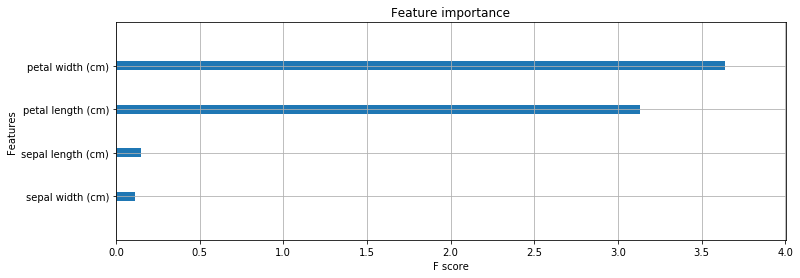

In [14]:
#性能向上に寄与する度合いで重油小戸をプロットする
_, ax = plt.subplots(figsize=(12,4))
xgb.plot_importance(bst,
                   ax=ax,
                   importance_type='gain',
                   show_values=False)
plt.show()